In [39]:
import random as rd
import numpy as np
import scipy as sp

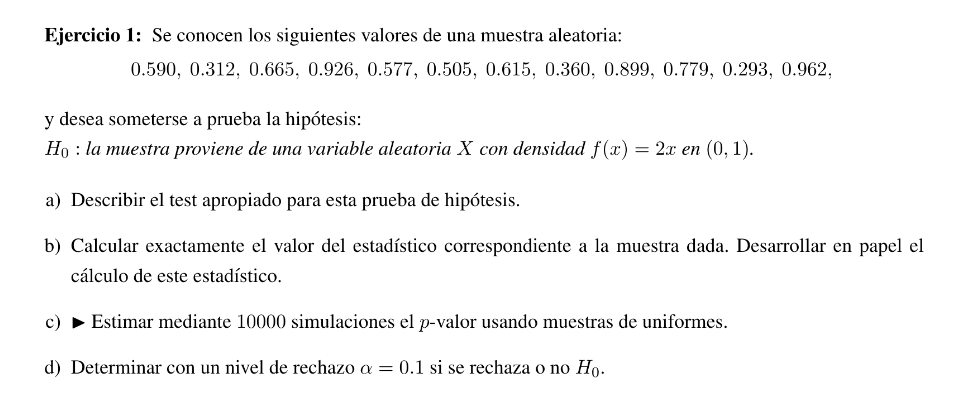

Si la  variable aleatoria X tiene densidad $f(x)=2x$ en (0,1). Entonces la funcion de distribucion acomulada es:
$$
F(x) = \int_{0}^{x} 2t dt = t^2 |_{0}^{x} = x^2 \\
F(x) = \begin{cases} 0 & \text{si } x \leq 0 \\ x^2 & \text{si } 0 < x < 1 \\ 1 & \text{si } x \geq 1 \end{cases}
$$

Y si queremos generar una muestra de dicha distribucion debemos obtener la inversa de la funcion de distribucion acumulada:
$$
F(x) = x^2 \Rightarrow x = \sqrt{u} \text{ con } u \sim U(0,1)
$$

In [40]:
def F(x):
    if x < 0:
        return 0
    elif x >=1:
        return 1
    else:
        return x**2

Luego el test apropiado para esta hipotesis es el test de Kolmogorov-Smirnov. Como en este caso nuesta hipotesis sugiere que los datos vienen de una distribucion F conocida, entonces sean $x_{(1)},x_{(2)}, \cdots, x_{(n)}$ las muestras podemos calcular el estadistico de Kolmogorov-Smirnov como:
$$
D = \max_{1 \leq i \leq n} \left( \max \left( F(x_{(i)}) - \frac{i-1}{n}, \frac{i}{n} - F(x_{(i)}) \right) \right)
$$

In [41]:
x_n = [0.590, 0.312, 0.665, 0.926, 0.577, 0.505, 0.615, 0.360, 0.899, 0.779, 0.293, 0.962]
x_n.sort()
print(x_n)
print(f"Tamaño de la muestra n: {len(x_n)}")

[0.293, 0.312, 0.36, 0.505, 0.577, 0.59, 0.615, 0.665, 0.779, 0.899, 0.926, 0.962]
Tamaño de la muestra n: 12


In [42]:
def estadistico_K_S(fun, x_n):
    x_n.sort()
    n = len(x_n)
    D = 0
    for i in range(n):
        izq = ((i+1)/n) - fun(x_n[i])
        der = fun(x_n[i]) - (i/n)
        D = max(D, izq, der)
    return D

In [43]:
estadistico_K_S(F, x_n)

0.2244416666666666

In [44]:
def estimar_pvalor_K_S(nsims, fun, x_n):
    n = len(x_n)
    D = estadistico_K_S(fun, x_n)
    hits = 0
    for i in range(nsims):
        """ 
        Debo generar nsims muestras de tamaño n de una distribución uniforme, 
        y calcular el estadistico D. Luego el p-valor es la proporcion de
        veces que D es mayor que el estadistico de la muestra original. 
        """
        muestra_sim = np.random.uniform(size=n)
        D_sim = estadistico_K_S(lambda x: x, muestra_sim)
        if D_sim > D:
            hits += 1
    return hits/nsims

In [45]:
estimar_pvalor_K_S(10000, F, x_n)

0.5085

Como el nivel de rechazo es $\alpha = 0.1$ y el $p-valor \gt 0.1$ entonces no rechazo la $H_0$

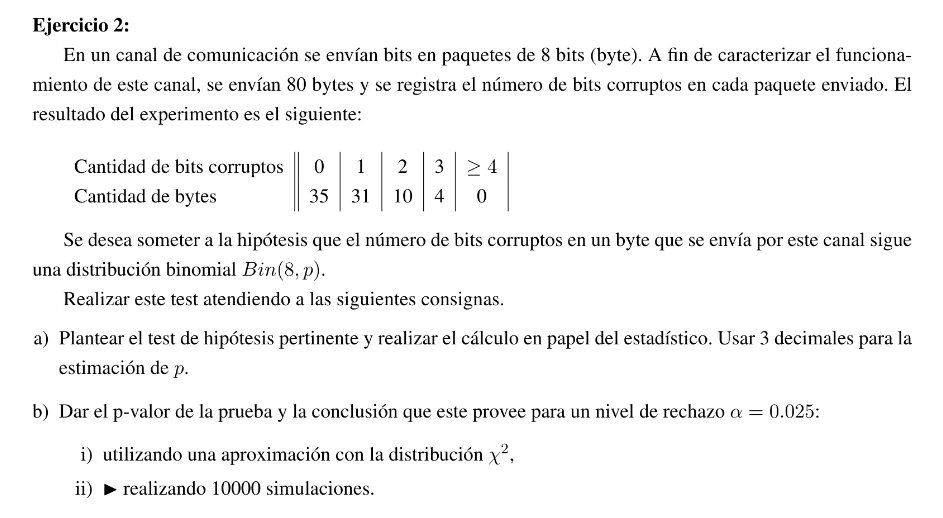

El test de hipotesis sera el siguiente:

$H_0$: la muestra proviene de una distribución Binomial(8,p), con parametro p desconocido.

Por lo que vamos a proceder a estimar el parametro p de la distribucion binomial utilizando la media muestral como estimador para la Esperanza.
$$
\begin{aligned}
Valores &= [0, 1, 2, 3, \geq 4] \\
Frecuencias observadas &= [35, 31, 10, 4, 0] \\

\hat{p} &= \frac{\bar{X}}{n}  \\
&= \frac{(1 \cdot 31 + 2 \cdot 10 + 3 \cdot 4)/80}{8} \\
&= \frac{(31 + 20 + 12)/80}{8} \\
&= 0.0984 \\
\end{aligned}
$$

Ahora que tengo mi funcion $\hat{F}$ puedo calcular los respectivos $\hat{p_i}$ para cada grupo.

$$
\text{Sea X~Bin(8,0.0984)}\\
p_0 = P(X = 0) = \binom{8}{0} 0.0984^0 (1-0.0984)^8  \\
p_1 = P(X = 1) = \binom{8}{1} 0.0984^1 (1-0.0984)^7  \\
p_2 = P(X = 2) = \binom{8}{2} 0.0984^2 (1-0.0984)^6  \\
p_3 = P(X = 3) = \binom{8}{3} 0.0984^3 (1-0.0984)^5  \\
p_4 = P(X \geq 4) = 1 - P(X \leq 3) = 1 - (p_0 + p_1 + p_2 + p_3) \\
$$

In [50]:
p_0 = round(sp.stats.binom.pmf(0, 8, 0.0984),4)
p_1 = round(sp.stats.binom.pmf(1, 8, 0.0984),4)
p_2 = round(sp.stats.binom.pmf(2, 8, 0.0984),4)
p_3 = round(sp.stats.binom.pmf(3, 8, 0.0984),4)
p_4 = round(1- (p_0 + p_1 + p_2 + p_3),4)
print(p_0, p_1, p_2, p_3, p_4)
Ni = [35, 31, 10, 4, 0]
n = sum(Ni)
print(f"Tamaño de la muestra n: {n}")
pi = [p_0, p_1, p_2, p_3, p_4]

0.4366 0.3812 0.1456 0.0318 0.0048
Tamaño de la muestra n: 80


Ahora que tengo los respectivos $\hat{p_i}$ utilizando el estimador de la proporcion, entonces puedo calcular el estadistico de chi-cuadrado.
$$
\begin{aligned}
T &= \sum_{i=0}^{4} \frac{(N_i - n \cdot p_i)^2}{n \cdot p_i} \\
&= \frac{(35 - 80 \cdot p_0)^2}{80 \cdot p_0} + \frac{(31 - 80 \cdot p_1)^2}{80 \cdot p_1} + \frac{(10 - 80 \cdot p_2)^2}{80 \cdot p_2} + \frac{(4 - 80 \cdot p_3)^2}{80 \cdot p_3} + \frac{(0 - 80 \cdot p_4)^2}{80 \cdot p_4} \\
\end{aligned}
$$

In [54]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t

def calcular_pvalor_param(t, k, m):
    return 1 - sp.stats.chi2.cdf(t, k-1-m)

In [75]:
t = estadistico(n, pi, Ni)
print(f"Estadistico: {t}")
pvalor = calcular_pvalor_param(t, len(Ni), 1)
print(f"P-valor: {pvalor}")

Estadistico: 1.4589509167057186
P-valor: 0.6917763176979443


In [68]:
sp.stats.chisquare(Ni, [n*p for p in pi], ddof=1)

Power_divergenceResult(statistic=1.4589509167057186, pvalue=0.6917763176979443)

Como el p-valor es mayor al nivel de rechazo $\alpha = 0.025$ entonces no rechazo la hipotesis nula.

In [78]:
"""  
Simula el pvalor en nsims siulaciones.

Parametros:
nsims: int, cantidad de simulaciones a realizar
n: int, tamaño de la muestra
pi: list, probabilidades de la distribución
Ni: list, frecuencias observadas
"""
def simular_pvalor(nsims, n, pi, Ni):
    p_hat = 0.0984
    t0 = estadistico(n, pi, Ni)
    hits = 0
    Ni_sim = [0, 0, 0, 0, 0]
    pi_sim = [0, 0, 0, 0, 0]
    for i in range(nsims):
        muestra_sim = np.random.binomial(8, p_hat, size=n)
        p_hat_sim = np.mean(muestra_sim)/8
        # recalculo las probabilidades para cada grupo con la nueva p_hat
        pi_sim[0] = round(sp.stats.binom.pmf(0, 8, p_hat_sim),4)
        pi_sim[1] = round(sp.stats.binom.pmf(1, 8, p_hat_sim),4)
        pi_sim[2] = round(sp.stats.binom.pmf(2, 8, p_hat_sim),4)
        pi_sim[3] = round(sp.stats.binom.pmf(3, 8, p_hat_sim),4)
        pi_sim[4] = round(1- (pi_sim[0] + pi_sim[1] + pi_sim[2] + pi_sim[3]),4)
        for j in range(5):
            Ni_sim[j] = np.sum(muestra_sim == j)
        t_sim = estadistico(n, pi_sim, Ni_sim)
        if t_sim > t0:
            hits += 1
    return hits/nsims

In [79]:
simular_pvalor(10000, n, pi, Ni)

0.6745